# Boston Area Assessment

## Import Datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
price_dataset1 = pd.read_csv('../datasets/price_datasets/fy2015.csv')
price_dataset2 = pd.read_csv('../datasets/price_datasets/fy2016.csv')
price_dataset3 = pd.read_csv('../datasets/price_datasets/fy2017.csv')
price_dataset4 = pd.read_csv('../datasets/price_datasets/fy2018.csv')
price_dataset5 = pd.read_csv('../datasets/price_datasets/fy2019.csv')
price_dataset6 = pd.read_csv('../datasets/price_datasets/fy2020.csv')
price_dataset7 = pd.read_csv('../datasets/price_datasets/fy2021.csv')
price_dataset8 = pd.read_csv('../datasets/price_datasets/fy2022.csv')
price_dataset9 = pd.read_csv('../datasets/price_datasets/fy2023.csv')
price_dataset10 = pd.read_csv('../datasets/price_datasets/fy2024.csv')
price_dataset11 = pd.read_csv('../datasets/price_datasets/fy2025.csv')

/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_25522/1096299413.py:2: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset2 = pd.read_csv('../datasets/price_datasets/fy2016.csv')
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_25522/1096299413.py:3: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset3 = pd.read_csv('../datasets/price_datasets/fy2017.csv')
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_25522/1096299413.py:4: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset4 = pd.read_csv('../datasets/price_datasets/fy2018.csv')
/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_25522/1096299413.py:5: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  price_dataset5 = pd.read_csv('../da

## Preprocessing 1

In [3]:
for i in range(1,10):
    print(f"Dataset {i} shape: ", eval(f"price_dataset{i}.shape"))

print(f"Total rows in all datasets: {sum([eval(f'price_dataset{i}.shape[0]') for i in range(1,10)])}")

Dataset 1 shape:  (168115, 56)
Dataset 2 shape:  (169199, 77)
Dataset 3 shape:  (170910, 75)
Dataset 4 shape:  (172841, 75)
Dataset 5 shape:  (174668, 75)
Dataset 6 shape:  (175052, 75)
Dataset 7 shape:  (177091, 63)
Dataset 8 shape:  (178598, 64)
Dataset 9 shape:  (180627, 60)
Total rows in all datasets: 1567101


In [4]:
combined_price_data = pd.concat([eval(f"price_dataset{i}") for i in range(1,10)], ignore_index=True)
print("Combined dataset shape: ", combined_price_data.shape)

Combined dataset shape:  (1567101, 134)


In [5]:
combined_price_data.to_csv('../datasets/price_datasets/combined_price_data.csv', index=False)

In [6]:
combined_price_data.head()

,PID,CM_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,full_address,PTYPE,LU,...,NUM_PARKING,PROP_VIEW,CORNER_UNIT,RC_UNITS,ORIENTATION,ZIP_CODE,OWNER MAIL ADDRESS,EXT_FNISHED,KITCHENS,FIREPLACES
0,1302299000_,NaN,199,SAVIN HILL,AV,NaN,02125_,199 SAVIN HILL AV,105.0,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1302298000_,NaN,195,SAVIN HILL,AV,NaN,02125_,195 SAVIN HILL AV,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1302297000_,NaN,193,SAVIN HILL,AV,NaN,02125_,193 SAVIN HILL AV,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1302296000_,NaN,6 8,SOUTHVIEW,ST,NaN,02125_,6 8 SOUTHVIEW ST,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1302295000_,NaN,10 12,SOUTHVIEW,ST,NaN,02125_,10 12 SOUTHVIEW ST,104.0,R2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
combined_price_data["KITCHENS"].value_counts()

KITCHENS
1.0    100775
0.0     36984
2.0     17734
3.0     13896
4.0       123
5.0         1
Name: count, dtype: int64

In [8]:
# Since "TOTAL_VALUE" is a key column for price prediction, we keep the data points that have it
print(f"Null Values: {combined_price_data['TOTAL_VALUE'].isna().sum()}")

Null Values: 1041187


In [9]:
clean_combined_price_data = combined_price_data.dropna(subset=["TOTAL_VALUE"])
print("Cleaned combined dataset shape: ", clean_combined_price_data.shape)

Cleaned combined dataset shape:  (525914, 134)


In [10]:
cols = list(clean_combined_price_data.columns)
with open("clean_combined_price_data_columns.txt", "w", encoding="utf-8") as f:
    f.write("These are all the columns:\n")
    for c in cols:
        f.write(f"{c}\n")

print(f"Wrote {len(cols)} columns to clean_combined_price_data_columns.txt")


Wrote 134 columns to clean_combined_price_data_columns.txt


In [11]:
clean_combined_price_data.columns


Index(['PID', 'CM_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM',
       'ZIPCODE', 'full_address', 'PTYPE', 'LU',
       ...
       'NUM_PARKING', 'PROP_VIEW', 'CORNER_UNIT', 'RC_UNITS', 'ORIENTATION',
       'ZIP_CODE', 'OWNER MAIL ADDRESS', 'EXT_FNISHED', 'KITCHENS',
       'FIREPLACES'],
      dtype='object', length=134)

In [12]:
# Check dtype and sample values for TOTAL_VALUE only in clean_combined_price_data
if "clean_combined_price_data" in globals() and "TOTAL_VALUE" in clean_combined_price_data.columns:
    print("TOTAL_VALUE dtype:", clean_combined_price_data["TOTAL_VALUE"].dtype)
    print("Sample:", clean_combined_price_data["TOTAL_VALUE"].head(3).tolist())
else:
    print("clean_combined_price_data or TOTAL_VALUE column not found.")


TOTAL_VALUE dtype: object
Sample: ['$719,400.00 ', '$744,800.00 ', '$730,500.00 ']


In [13]:
clean_combined_price_data['TOTAL_VALUE'] = clean_combined_price_data['TOTAL_VALUE'].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_25522/180460179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_price_data['TOTAL_VALUE'] = clean_combined_price_data['TOTAL_VALUE'].str.replace('$', '').str.replace(',', '').astype(float)


# === Visualize Start Here ===

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [15]:
for col in ["KITCHENS", "FIREPLACES", "SFYI_VALUE", " GROSS_TAX "]:
    if col in clean_combined_price_data.columns:
        print(f"\n=== {col} ===")
        print("Dtype:", clean_combined_price_data[col].dtype)
        print("Unique non-null values:", clean_combined_price_data[col].nunique())
        print("Sample values:", clean_combined_price_data[col].dropna().unique()[:10])



=== KITCHENS ===
Dtype: float64
Unique non-null values: 6
Sample values: [3. 2. 1. 4. 0. 5.]

=== FIREPLACES ===
Dtype: float64
Unique non-null values: 13
Sample values: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


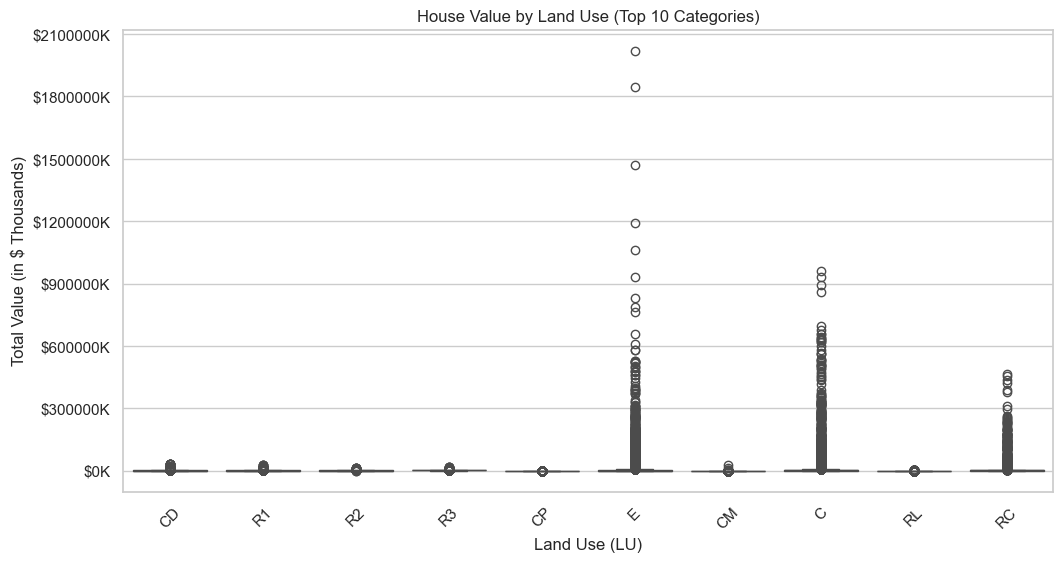

In [16]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,6))
top_lu = clean_combined_price_data["LU"].value_counts().head(10).index
subset = clean_combined_price_data[clean_combined_price_data["LU"].isin(top_lu)]

sns.boxplot(x="LU", y="TOTAL_VALUE", data=subset, order=top_lu)
plt.title("House Value by Land Use (Top 10 Categories)")
plt.xlabel("Land Use (LU)")
plt.ylabel("Total Value (in $ Thousands)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
ax.yaxis.set_major_locator(mtick.MaxNLocator(8)) 

plt.show()

/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_25522/627973046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_price_data["ZIPCODE"] = clean_combined_price_data["ZIPCODE"].astype(str)


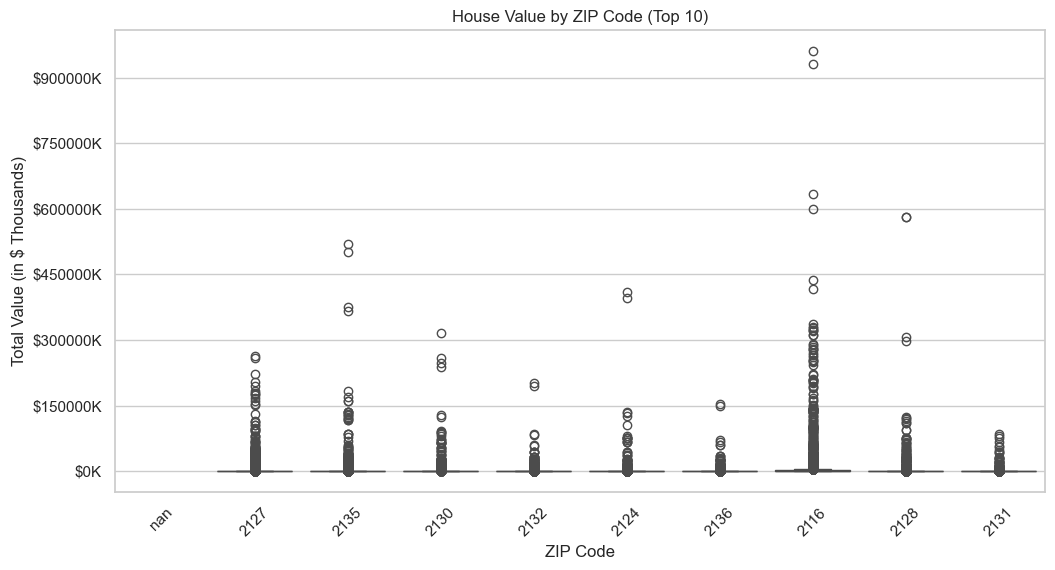

In [17]:
plt.figure(figsize=(12,6))

clean_combined_price_data["ZIPCODE"] = clean_combined_price_data["ZIPCODE"].astype(str)
top_zip = clean_combined_price_data["ZIPCODE"].value_counts().head(10).index
subset = clean_combined_price_data[clean_combined_price_data["ZIPCODE"].isin(top_zip)]

sns.boxplot(x="ZIPCODE", y="TOTAL_VALUE", data=subset, order=top_zip)
plt.title("House Value by ZIP Code (Top 10)")
plt.xlabel("ZIP Code")
plt.ylabel("Total Value (in $ Thousands)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
ax.yaxis.set_major_locator(mtick.MaxNLocator(8))

plt.show()

Top numeric features for histograms: ['LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'COM_UNITS', 'LUC', 'YR_BUILT']


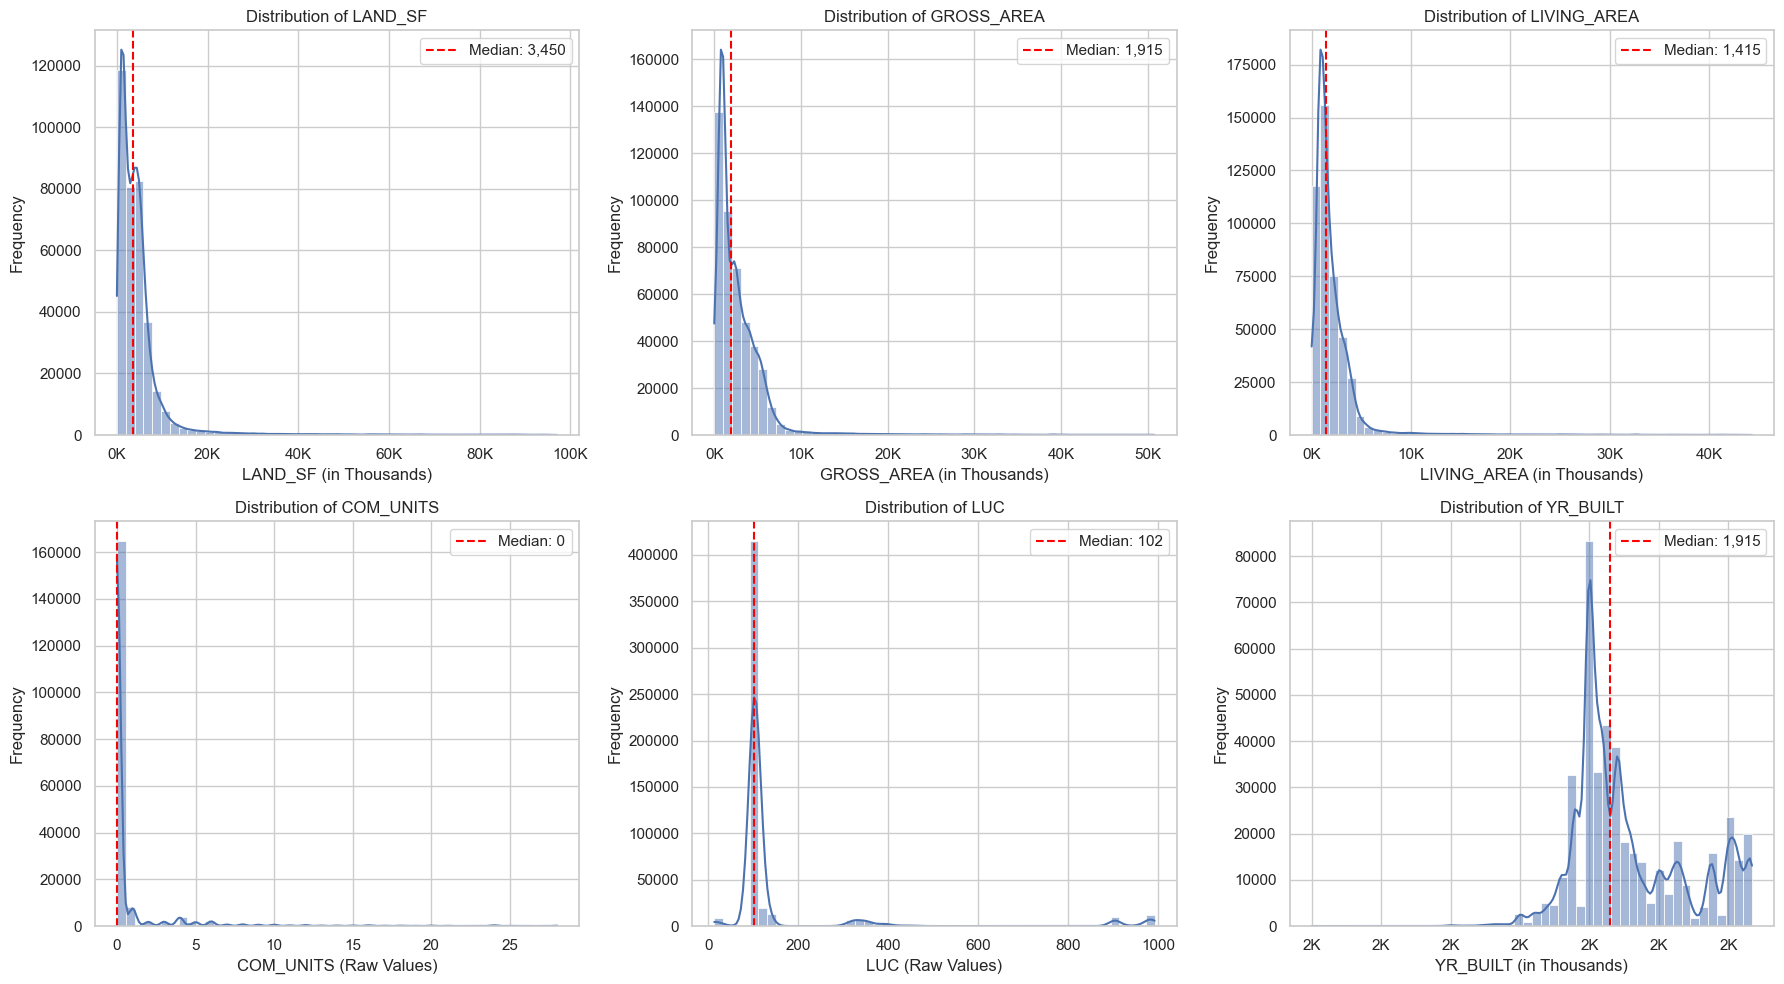

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

numeric_cols = clean_combined_price_data.select_dtypes(include=[np.number]).columns.tolist()
variances = clean_combined_price_data[numeric_cols].var().sort_values(ascending=False)
top_features = [c for c in variances.index if c != "TOTAL_VALUE"][:6]

print("Top numeric features for histograms:", top_features)
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()
for i, col in enumerate(top_features):
    series = clean_combined_price_data[col].dropna()
    cutoff = np.percentile(series, 99)
    series = series[series < cutoff]
    median_val = series.median()
    sns.histplot(series, bins=50, kde=True, ax=axes[i])
    axes[i].axvline(median_val, color="red", linestyle="--", label=f"Median: {median_val:,.0f}")
    axes[i].set_title(f"Distribution of {col}")
    if series.max() > 1e6:   
        axes[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        axes[i].set_xlabel(f"{col} (in Millions)")
    elif series.max() > 1e3:
        axes[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))
        axes[i].set_xlabel(f"{col} (in Thousands)")
    else:
        axes[i].set_xlabel(f"{col} (Raw Values)")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()
    
plt.tight_layout()
plt.show()


/var/folders/jr/6hpd926x01q2bpbt1tt_p10m0000gn/T/ipykernel_25522/2853100186.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


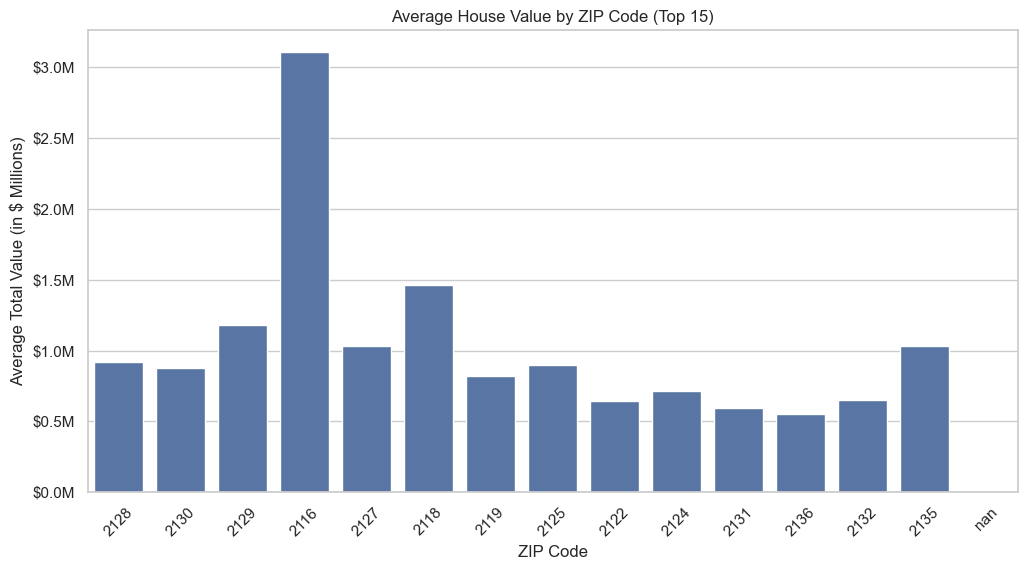

In [19]:
import matplotlib.ticker as mtick

if "ZIPCODE" in clean_combined_price_data.columns:
    
    top_zips = clean_combined_price_data["ZIPCODE"].value_counts().head(15).index
    subset = clean_combined_price_data[clean_combined_price_data["ZIPCODE"].isin(top_zips)]

    plt.figure(figsize=(12,6))
    sns.barplot(
        x="ZIPCODE", 
        y="TOTAL_VALUE", 
        data=subset, 
        estimator="mean", 
        ci=None
    )

    plt.title("Average House Value by ZIP Code (Top 15)")
    plt.xlabel("ZIP Code")
    ax = plt.gca()
    max_val = subset["TOTAL_VALUE"].max()

    if max_val > 1e6:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
        plt.ylabel("Average Total Value (in $ Millions)")
    elif max_val > 1e3:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e3:.0f}K'))
        plt.ylabel("Average Total Value (in $ Thousands)")
    else:
        plt.ylabel("Average Total Value ($)")

    plt.xticks(rotation=45)
    plt.show()
else:
    print("ZIPCODE column not found in dataset.")


# === Visualize Ends Here ===

In [20]:
clean_combined_price_data = combined_price_data.dropna(subset=["TOTAL_VALUE"])
print("Cleaned combined dataset shape: ", clean_combined_price_data.shape)

Cleaned combined dataset shape:  (525914, 134)


In [21]:
print("These are all the columns: \n", clean_combined_price_data.columns)

These are all the columns: 
 Index(['PID', 'CM_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM',
       'ZIPCODE', 'full_address', 'PTYPE', 'LU',
       ...
       'NUM_PARKING', 'PROP_VIEW', 'CORNER_UNIT', 'RC_UNITS', 'ORIENTATION',
       'ZIP_CODE', 'OWNER MAIL ADDRESS', 'EXT_FNISHED', 'KITCHENS',
       'FIREPLACES'],
      dtype='object', length=134)


In [22]:
clean_combined_price_data["FULL_BTH"].value_counts()

FULL_BTH
1.0     193588
2.0     130457
0.0      84750
3.0      58467
4.0       7054
6.0       1514
5.0       1296
7.0        143
8.0         79
9.0         28
12.0         4
17.0         3
13.0         2
14.0         1
Name: count, dtype: int64

In [23]:
clean_combined_price_data["BED_RMS"].value_counts()

BED_RMS
2.0     109935
3.0      80956
1.0      65191
0.0      53400
4.0      45752
6.0      30538
5.0      24478
9.0       9868
8.0       6894
7.0       6591
11.0      1152
10.0      1084
12.0       934
14.0       144
13.0        85
15.0        49
17.0         8
16.0         6
18.0         4
Name: count, dtype: int64

In [24]:
preferred_columns = [
    "ZIPCODE",
    "LU",
    "OWN_OCC",
    "LAND_SF",
    "YR_BUILT",
    "GROSS_AREA",
    "LIVING_AREA",
    "NUM_FLOORS",
    "STRUCTURE_CLASS",
    "CITY",
    "NUM_BLDGS",
    "LUC",
    "LU_DESC",
    "BLDG_TYPE",
    "RES_FLOOR",
    "RES_UNITS",
    "COM_UNITS",
    "YR_REMODEL",
    "ROOF_STRUCTURE",
    "ROOF_COVER",
    "INT_WALL",
    "EXT_FINISHED",
    "INT_COND",
    "EXT_COND",
    "OVERALL_COND",
    "BED_RMS",
    "FULL_BTH",
    "HLF_BTH",
    "KITCHEN",
    "TT_RMS",
    "BTHRM_STYLE1",
    "KITCHEN_TYPE",
    "KITCHEN_STYLE1",
    "HEAT_TYPE",
    "HEAT_FUEL",
    "AC_TYPE",
    "FIRE_PLACE",
    "NUM_PARKING",
    "PROP_VIEW",
    "CORNER_UNIT",
    "ORIENTATION",
    "KITCHENS",
    "FIREPLACES",
    "TOTAL_VALUE",
]

existing_columns = [c for c in preferred_columns if c in clean_combined_price_data.columns]
missing_columns = sorted(set(preferred_columns) - set(existing_columns))

if missing_columns:
    print(
        "Skipping columns not found in dataset (safe to ignore if expected):",
        missing_columns,
    )

clean_combined_price_data = clean_combined_price_data[existing_columns]
clean_combined_price_data

,ZIPCODE,LU,OWN_OCC,LAND_SF,YR_BUILT,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,CITY,...,HEAT_FUEL,AC_TYPE,FIRE_PLACE,NUM_PARKING,PROP_VIEW,CORNER_UNIT,ORIENTATION,KITCHENS,FIREPLACES,TOTAL_VALUE
1030785,2128,R3,Y,1150.0,1900.0,3353.0,2202.0,NaN,R -,EAST BOSTON,...,NaN,N - None,NaN,3.0,A - Average,NaN,NaN,NaN,NaN,"$719,400.00"
1030786,2128,R3,Y,1150.0,1920.0,3299.0,2307.0,NaN,R -,EAST BOSTON,...,NaN,C - Central AC,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,"$744,800.00"
1030787,2128,R3,N,1150.0,1905.0,3392.0,2268.0,NaN,R -,EAST BOSTON,...,NaN,N - None,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,"$730,500.00"
1030788,2128,R3,N,1150.0,1900.0,3108.0,2028.0,NaN,R -,EAST BOSTON,...,NaN,N - None,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,"$667,900.00"
1030789,2128,R2,Y,2010.0,1900.0,3700.0,2546.0,NaN,R -,EAST BOSTON,...,NaN,N - None,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,"$714,200.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567096,NaN,E,N,5931.0,NaN,NaN,NaN,NaN,NaN,BRIGHTON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,240500
1567097,NaN,RL - RL,N,4588.0,NaN,NaN,NaN,NaN,NaN,BRIGHTON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,71400
1567098,NaN,R3,N,7380.0,1920.0,4291.0,2834.4,NaN,NaN,BRIGHTON,...,NaN,N - None,NaN,2.0,A - Average,NaN,NaN,3.0,0.0,1314900
1567099,NaN,C,N,12500.0,1947.0,14520.0,7260.0,NaN,C - Brick/Concr,BRIGHTON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2478800


In [25]:
clean_combined_price_data.shape

(525914, 44)

In [ ]:
combined_price_data.to_csv('../datasets/price_datasets/combined_price_data.csv', index=False)